<a href="https://colab.research.google.com/github/dudesparsh/Applied-ML/blob/master/APPLE_stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-4-20') 
#Show the data 
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [ ]:
df.shape

(2003, 6)

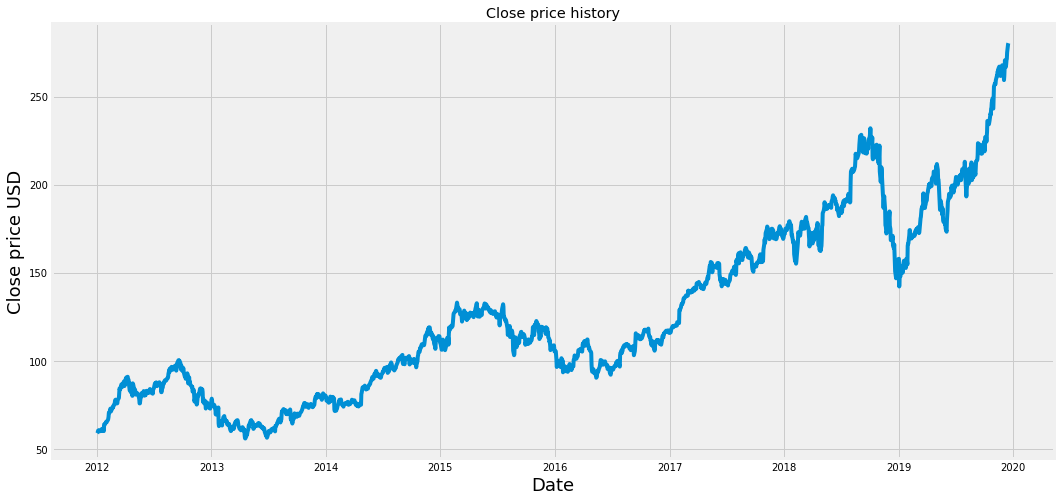

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price USD', fontsize = 18)
plt.show()

In [ ]:
# Creating a dataframe with only 'close' column
data = df.filter(['Close'])

# Converting the datafram to numpy array
dataset = data.values

# Get / Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 


In [ ]:
#Scale all of data to be values b/w 0 & 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]

#Splitting the data in x_train and y_train data set
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [ ]:
# So that we can feed this data to LSTM
# Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Since LSTM model is excepting data in 3d form
# no of samples, no of time steps, no of features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [ ]:
# LSTM model : 2 layers with 50 neurons and 
# 2 dense layers with 25 neurons and one neuron
# Building the LSTM network model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


In [ ]:
# Using adam optimizer and rmse loss function
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1543/1543 [==============================] - 56s 36ms/step - loss: 6.7566e-04


In [ ]:
x_train.shape

(1943, 60, 1)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)


In [ ]:
test_data.shape

(460, 1)

In [ ]:
# Reshape the data into the shape accepted by LSTM

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Getting the models predicted price values
predictions = model.predict(x_test)
# Undoing scaling
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


7.18320455448428

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


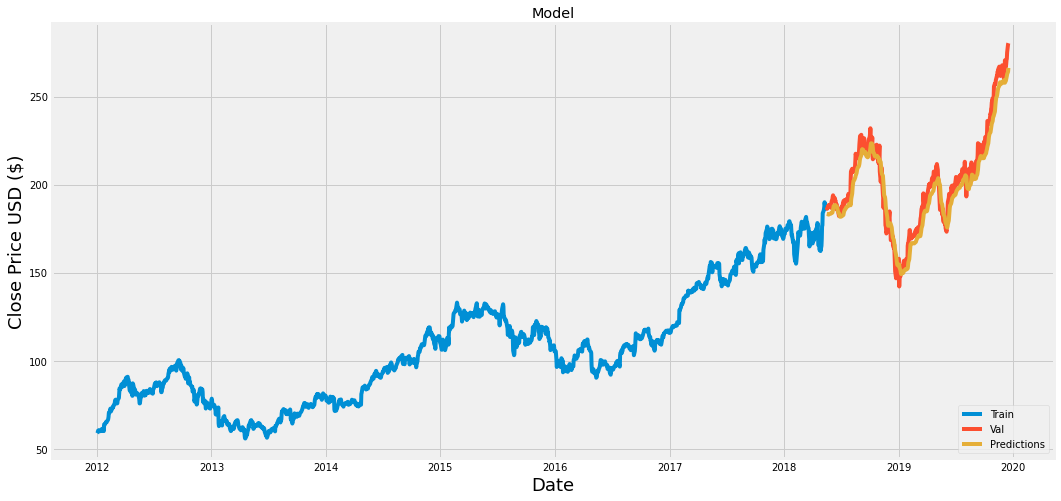

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2018-05-17,186.990005,183.471375
2018-05-18,186.309998,183.426346
2018-05-21,187.630005,183.182281
2018-05-22,187.160004,183.084076
2018-05-23,188.360001,183.004791
...,...,...
2019-12-11,270.769989,260.696686
2019-12-12,271.459991,261.741730
2019-12-13,275.149994,262.806976


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-4-20')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[273.8228]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-4-20', end='2020-4-20')
print(apple_quote2['Close'])


Date
2020-04-20    276.929993
Name: Close, dtype: float64
